<a href="https://colab.research.google.com/github/sravan404/ML_Models/blob/master/Capstone_Project_v1_0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install -q pydicom

In [ ]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')
#Google drive
from google.colab import drive
from google.colab import files
#OS
import os;
#pandas
import pandas as pd
#plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pydicom as dcm 
from glob import glob
#
from tqdm import tqdm_notebook

# Folder mounting 

In [ ]:
#mount the drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Target Folders
projectFolder = '/content/drive/My Drive/GL_AI_ML/Assignments/Capstone'
dataSetFolder = 'dataset'
train_img_folder ='stage_2_train_images'
test_img_folder='stage_2_test_images'

#  Download dataset from Kaggle and store in the Drive
#### * Do not execute this if dataset is already downloaded

In [ ]:
#Change the working directory
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
files.upload()

Saving kaggle (1).json to kaggle (1) (2).json


{'kaggle (1).json': b'{"username":"sravan404","key":"5510ace9e718ead7d0aef61e7e0b3537"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10/kaggle-1.5.10-cp36-none-any.whl
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge

In [ ]:
!ls

 drive	'kaggle (1) (1).json'  'kaggle (1).json'   kaggle.json	 sample_data


In [ ]:
os.chdir(projectFolder)
!mkdir dataSetFolder

In [ ]:
!unzip rsna-pneumonia-detection-challenge.zip -d dataSetFolder

###  Change the working directory

In [ ]:
! mkdir projectFolder

In [ ]:
os.chdir(projectFolder)

In [ ]:
!ls

 drive	'kaggle (1).json'   kaggle.json   sample_data


### Navigate to the folder which contains the dataset

In [ ]:
print('Reading Datasets (.csv files) from /',dataSetFolder,'..'*20)
train_labels = pd.read_csv(dataSetFolder+'/stage_2_train_labels.csv')
class_info = pd.read_csv(dataSetFolder+'/stage_2_detailed_class_info.csv')

# Combinig data


In [ ]:
# Merge the above data information into one dataframe
merge_df = pd.merge(left = class_info, right = train_labels, how = 'left', on = 'patientId')

In [ ]:
merge_df.head()

In [ ]:
train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
print('Count of the labels :',train_labels.count()[0])

Count of the labels : 30227


In [ ]:
class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [ ]:
print('Count of the class info:',class_info.count()[0])

Count of the class info: 30227


### Checking NULL values

In [ ]:
missing_df = pd.DataFrame(merge_df.isnull().sum())
missing_df.columns=['Total missing values']
print('Displaying the NULL counts for Labels.......')
missing_df.T

Displaying the NULL counts for Labels.......


,patientId,x,y,width,height,Target
Total missing values,0,20672,20672,20672,20672,0


#### Observation:
* Missing values in x and y indicates absence of Pneumonia and target label is 0 for those records

In [ ]:
print('Displaying the NULL counts for Class.......')
missing_df1 = pd.DataFrame(class_info.isnull().sum())
missing_df1.columns=['Total missing values']
missing_df1.T

Displaying the NULL counts for Class.......


,patientId,class
Total missing values,0,0


#### Observation:
* No Missing values

### Visualization of different classes

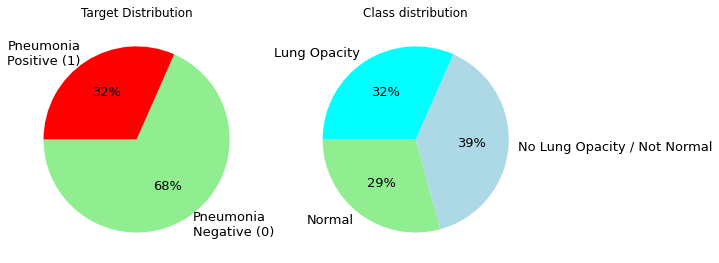

In [ ]:
fig = plt.figure(figsize = (10, 5))
fig_plot = fig.add_subplot(121)
fig_graph = (merge_df['Target'].value_counts()
    .plot(kind = 'pie', autopct = '%.0f%%', 
          labels = ['Pneumonia\nNegative (0)', 'Pneumonia\nPositive (1)'], 
          colors = ['lightgreen', 'red'], 
          startangle = 180, 
          title = 'Target Distribution', fontsize = 13)
    .set_ylabel(''))

fig_plot = fig.add_subplot(122)
fig_graph = (merge_df['class'].value_counts().sort_index(ascending = False)
    .plot(kind = 'pie', autopct = '%.0f%%', 
          colors = ['lightgreen', 'lightblue', 'aqua'], 
          startangle = 180, title = 'Class distribution', 
          fontsize = 13)
    .set_ylabel(''))
plt.tight_layout()

In [ ]:
# Get the repeated patient id's
repeated_patient_ids = merge_df.groupby('patientId').size()
repeated_patient_ids

patientId
0004cfab-14fd-4e49-80ba-63a80b6bddd6    1
000924cf-0f8d-42bd-9158-1af53881a557    1
000db696-cf54-4385-b10b-6b16fbb3f985    2
000fe35a-2649-43d4-b027-e67796d412e0    2
001031d9-f904-4a23-b3e5-2c088acd19c6    2
                                       ..
fffb2395-8edd-4954-8a89-ffe2fd329be3    2
fffba05a-1635-4545-9bbd-57ad4cfe8d27    1
fffc95b5-605b-4226-80ab-62caec682b22    1
fffcff11-d018-4414-971a-a7cefa327795    1
fffec09e-8a4a-48b1-b33e-ab4890ccd136    1
Length: 26684, dtype: int64

In [ ]:
print('Number of Unique patient IDs in the dataset: {}'.format(len(repeated_patient_ids)))

Number of Unique patient IDs in the dataset: 26684


#### Check for the boundary boxes

In [ ]:
bounding_boxes= repeated_patient_ids.to_frame('number_of_boxes').reset_index()
bounding_boxes

,patientId,number_of_boxes
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,1
1,000924cf-0f8d-42bd-9158-1af53881a557,1
2,000db696-cf54-4385-b10b-6b16fbb3f985,2
3,000fe35a-2649-43d4-b027-e67796d412e0,2
4,001031d9-f904-4a23-b3e5-2c088acd19c6,2
...,...,...
26679,fffb2395-8edd-4954-8a89-ffe2fd329be3,2
26680,fffba05a-1635-4545-9bbd-57ad4cfe8d27,1
26681,fffc95b5-605b-4226-80ab-62caec682b22,1
26682,fffcff11-d018-4414-971a-a7cefa327795,1


In [ ]:
box_df = pd.DataFrame(bounding_boxes.groupby('number_of_boxes').size(),columns=['Total Patients'])
box_df.index.names = ['Bounding Boxes']
box_df

,Total Patients
Bounding Boxes,
1,23286
2,3266
3,119
4,13


In [ ]:
train_labels_boxes = trainmerge_df_labels.copy(deep=True)
train_labels_boxes = train_labels_boxes.merge(bounding_boxes, on = 'patientId', how = 'left')

In [ ]:
train_labels_boxes

,patientId,x,y,width,height,Target,number_of_boxes
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,2
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,1
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,1
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,2


In [ ]:
print('Shape of the dataset after the merging : {}'.format(train_labels_boxes_class.shape))

Shape of the dataset after the merging : (30227, 8)


### Read DICOM Images

# DICOM META DATA

In [ ]:
#df_meta = df.drop('class', axis = 1).copy()
df_meta = merge_df.copy()
dcm_columns = None

for n, pid in enumerate(df_meta['patientId'].unique()):
    if (n+1)%1000==0:
        print(n,len(df_meta['patientId'].unique()))
    dcm_file = TRAIN_PATH+'%s.dcm' % pid
    dcm_data = pydicom.read_file(dcm_file)
    
    if not dcm_columns:
        dcm_columns = dcm_data.dir()
        dcm_columns.remove('PixelSpacing')
        dcm_columns.remove('PixelData')
        dcm_columns.remove('PatientName')
    for col in dcm_columns:
      if not (col in df_meta.columns):
         df_meta[col] = np.nan
      idx = df_meta[df_meta['patientId'] == pid].index
      temp_data = dcm_data.data_element(col).value
      df_meta.loc[idx, col] = temp_data
    
    del dcm_data
    del temp_data
    
gc.collect()

In [ ]:
df_meta.head()

In [ ]:
df_meta.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia_matadata.csv')

In [ ]:
df_meta = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia_matadata.csv')

In [ ]:
df_meta.columns

In [ ]:
df_meta['PatientAge'] = df_meta['PatientAge'].astype(int)
df_meta['PatientSex'].astype('category')
df_meta['ViewPosition'].astype('category')
df_meta['PatientSex'] = np.where(df_meta["PatientSex"].str.contains("M"), 1, 0)
df_meta['ViewPosition'] = np.where(df_meta["ViewPosition"].str.contains("AP"), 1, 0)

In [ ]:

df_meta['SeriesDescription'] = df_meta['SeriesDescription'].map({'view: AP': 'AP', 'view: PA': 'PA'})

df_meta.drop('SeriesDescription', axis = 1, inplace = True)


In [ ]:
df_meta.head(1)

In [ ]:
df_meta.info()

In [ ]:
df_meta_preProcess = df_meta

In [ ]:
df_meta_preProcess = df_meta.drop(['patientId','StudyInstanceUID','SOPInstanceUID','SOPClassUID','PatientID','BodyPartExamined','LossyImageCompressionMethod','SpecificCharacterSet','SeriesInstanceUID'],axis=1)

In [ ]:
df_meta_preProcess.info()

In [ ]:
df_meta_preProcess[['ConversionType','Modality','PhotometricInterpretation']].nunique()

In [ ]:
# seems like ConversionType ,   Modality  , PhotometricInterpretation   have single value to dropping these  too and few fileds are null so removing them too
df_meta_preProcess = df_meta.drop(['patientId','StudyInstanceUID','SOPInstanceUID','SOPClassUID','PatientID','BodyPartExamined','LossyImageCompressionMethod','SpecificCharacterSet','SeriesInstanceUID','ConversionType','Modality','PhotometricInterpretation','StudyID','ReferringPhysicianName','PatientOrientation','PatientBirthDate','AccessionNumber'],axis=1)

In [ ]:
df_meta_preProcess.info()

In [ ]:
plt.figure(figsize = (25, 5))
sns.countplot(x = 'PatientAge', hue = 'Target', data = df_meta_preProcess)
plt.show()

In [ ]:
sns.countplot(x = 'PatientSex', hue = 'Target', data = df_meta_preProcess)

In [ ]:
sns.countplot(x = 'ViewPosition', hue = 'Target', data = df_meta_preProcess)

In [ ]:
df_meta_preProcess[['Target','x','y','width','height','PatientAge','PatientSex']].corr()

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

import warnings
warnings.simplefilter("ignore")

In [ ]:
def fast_lgbm_cv_scores(df, target, task, rs = 0):
    
    clf = LGBMClassifier(n_estimators = 10000, nthread = 4, random_state = rs)
    metric = 'auc'

    # Cross validation model
    folds = KFold(n_splits = 10, shuffle = True, random_state = rs)
        
    # Create arrays and dataframes to store results
    pred = np.zeros(df.shape[0])
    
    feats = df.columns.drop(target)
    
    feature_importance_df = pd.DataFrame(index = feats)
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df[feats], df[target])):
        train_x, train_y = df[feats].iloc[train_idx], df[target].iloc[train_idx]
        valid_x, valid_y = df[feats].iloc[valid_idx], df[target].iloc[valid_idx]

        clf.fit(train_x, train_y, 
                eval_set = [(valid_x, valid_y)], eval_metric = metric, 
                verbose = -1, early_stopping_rounds = 100)

        pred[valid_idx] = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)[:, 1]
        
        feature_importance_df[n_fold] = pd.Series(clf.feature_importances_, index = feats)
        
        del train_x, train_y, valid_x, valid_y
        gc.collect()

    return feature_importance_df, pred, roc_auc_score(df[target], pred)

In [ ]:
df_meta_preProcess.columns

In [ ]:
f_imp, _, score = fast_lgbm_cv_scores(df_meta_preProcess,target = 'Target', task = 'classification')
print('ROC-AUC for Target = {}'.format(score))

In [ ]:
f_imp

In [ ]:
f_imp, _, score = fast_lgbm_cv_scores(df_meta[['Target','PatientAge','PatientSex','ViewPosition']],target = 'Target', task = 'classification')
print('ROC-AUC for Target = {}'.format(score))

In [ ]:
f_imp

Pre processing


In [70]:
import os
import csv
import random
import pydicom
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import cv2
from skimage.transform import resize

In [ ]:
pneumonia_locations = {}
# load table
with open(os.path.join('/content/pneumonia/stage_2_train_labels.csv'),
          'r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [ ]:
len(pneumonia_locations)

In [ ]:
# load and shuffle filenames
folder = '/content/pneumonia/stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 8000
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

In [ ]:
class generator(keras.utils.Sequence):    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') 
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [ ]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [ ]:
def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [ ]:
input_img = Input((224, 224, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.summary()

In [ ]:
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# def bce_loss(y_true,y_pred):
#   return keras.losses.binary_crossentropy(y_true,y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

In [ ]:
model.compile(optimizer='adam',
                     loss=iou_loss,
                     metrics=[mean_iou,'accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint("pnuemonia-detection-unet_{val_loss:.4f}.h5",monitor='val_loss',
                             verbose=1, save_best_only=False,save_weights_only=True, mode="auto")

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [ ]:
# create train and validation generators
folder = '/content/pneumonia/stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=64, 
                      image_size=224, shuffle=True, augment=False, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=64, 
                      image_size=224, shuffle=False, predict=False)

# Karthik Code

In [ ]:
!ls

dataset  rsna-pneumonia-detection-challenge.zip


In [ ]:
pid= merge_df['patientId'][0]
dcm_file = dataSetFolder+'/'+train_img_folder+'/' + '{}.dcm'.format(pid)
dcm_data = dcm.read_file(dcm_file)

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
#print('--',os.path)
print('Read the training images file names and path')
print('+'*40)
images_df = pd.DataFrame({'path': glob(os.path.join(projectFolder+"/"+dataSetFolder+"/"+train_img_folder, '*.dcm'))})
images_df['patientId'] = images['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
print('Number of training images: {}'.format(images_df.shape[0]))
print('Training images columns: {}'.format(list(images_df.columns)))
print('+'*40)

Read the training images file names and path
++++++++++++++++++++++++++++++++++++++++
Number of training images: 26684
Training images columns: ['path', 'patientId']
++++++++++++++++++++++++++++++++++++++++


In [ ]:
images_df.head(10)

,path,patientId
0,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7314793-6863-4d4c-b090-a29308443ba7
1,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f696261f-49c1-4274-81be-4e6b9e8c5602
2,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7c0d1b0-ddab-4199-bd80-7f6963a3fa3c
3,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f69af194-65fb-412b-8004-9b6a643b1c39
4,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7a1de8c-7802-4af3-98c4-4dfb088b986d
5,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f7793f41-fe23-4e09-8bef-6394b56bed37
6,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f6d5b202-5ff1-428a-8d3e-5b64d67fc095
7,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f6c8b5ed-851e-44ae-90d3-b39cbd112305
8,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f77b0afe-0085-4ee0-afad-a1e9fda8fe65
9,/content/drive/My Drive/GL_AI_ML/Assignments/C...,f750621a-0f9d-4dea-941d-a2c52a8aba72


In [ ]:
#Function to get the features from the DICOM images
def get_image_features(data, path):
    images = os.listdir(path)
    for _, name in tqdm_notebook(enumerate(images)):
        img_path = os.path.join(path, name)
        img_data = dcm.read_file(img_path)
        idx = (data['patientId'] == img_data.PatientID)
        data.loc[idx,'PatientSex'] = img_data.PatientSex
        data.loc[idx,'PatientAge'] = pd.to_numeric(img_data.PatientAge)
        data.loc[idx,'BodyPartExamined'] = img_data.BodyPartExamined
        data.loc[idx,'ViewPosition'] = img_data.ViewPosition
        data.loc[idx,'Modality'] = img_data.Modality

In [ ]:
get_image_features(train_labels_boxes_class,projectFolder+"/"+dataSetFolder+"/"+train_img_folder)

In [ ]:
train_labels_boxes_class.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,PatientSex,PatientAge,BodyPartExamined,ViewPosition,Modality
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,51.0,CHEST,PA,CR
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,48.0,CHEST,PA,CR
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,M,19.0,CHEST,AP,CR
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal,M,28.0,CHEST,PA,CR
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,F,32.0,CHEST,AP,CR


In [ ]:
train_labels_boxes_class.shape

(30227, 13)

In [ ]:
print('Saving the DICOM features as an dataframe for further usage.......');
train_labels_boxes_class.to_pickle('./output/dicom_train_features.pkl')

Saving the DICOM features as an dataframe for further usage.......


In [ ]:
#Load the dataset from the pickle file
loaded_features_df = pd.read_pickle('./output/dicom_train_features.pkl')
loaded_features_df.shape

(30227, 13)

In [ ]:
#Merge the images path and train_class
processed_df=loaded_features_df.copy(deep=True)
processed_df= processed_df.merge(images_df, on = 'patientId', how = 'left')

In [ ]:
processed_df.head()

,patientId,x,y,width,height,Target,number_of_boxes,class,PatientSex,PatientAge,BodyPartExamined,ViewPosition,Modality,path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,51.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,F,48.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,No Lung Opacity / Not Normal,M,19.0,CHEST,AP,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,Normal,M,28.0,CHEST,PA,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,2,Lung Opacity,F,32.0,CHEST,AP,CR,/content/drive/My Drive/GL_AI_ML/Assignments/C...


In [ ]:
processed_df.shape

(30227, 14)

In [ ]:
processed_df.describe()

,x,y,width,height,Target,number_of_boxes,PatientAge
count,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000,30227.000000,30227.000000
mean,394.047724,366.839560,218.471376,329.269702,0.316108,1.244880,46.797764
std,204.574172,148.940488,59.289475,157.750755,0.464963,0.467829,16.892940
min,2.000000,2.000000,40.000000,45.000000,0.000000,1.000000,1.000000
25%,207.000000,249.000000,177.000000,203.000000,0.000000,1.000000,34.000000
50%,324.000000,365.000000,217.000000,298.000000,0.000000,1.000000,49.000000
75%,594.000000,478.500000,259.000000,438.000000,1.000000,1.000000,59.000000
max,835.000000,881.000000,528.000000,942.000000,1.000000,4.000000,155.000000


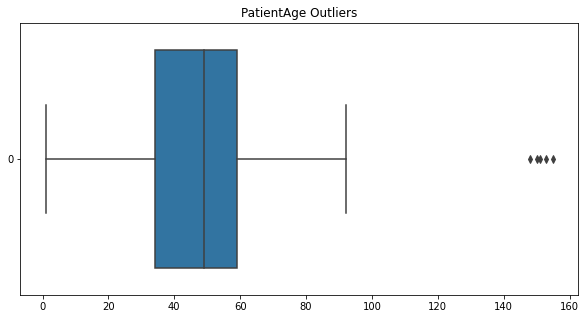

In [ ]:
fig = plt.figure(figsize = (10, 5))
fig_box_plot = sns.boxplot(data = processed_df['PatientAge'], orient = 'h').set_title('PatientAge Outliers')

In [ ]:
#Age
p_flag_0 =processed_df[processed_df["Target"] == 0]['PatientAge']
p_flag_1 = processed_df[processed_df["Target"] == 1]['PatientAge']

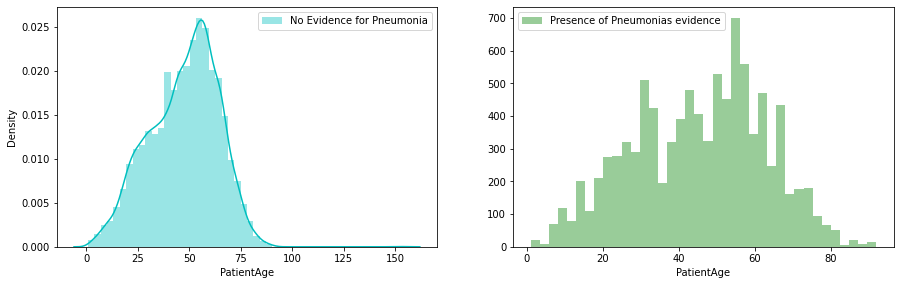

In [ ]:
plt.figure(figsize=(15, 15))
#Plotting Age group
plt.subplot(3,2,1)
sns.distplot(p_flag_0, color = 'c',label='No Evidence for Pneumonia',kde=False)
plt.legend()
plt.subplot(3,2,2)
sns.distplot(p_flag_1, color = 'g',label='Presence of Pneumonia''s evidence',kde=False)
plt.legend()
plt.show()